# House Sales in King County

## Data Preprocessing

In [ ]:
import pandas as pd

house_price = pd.read_csv('kc_house_data.csv')
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

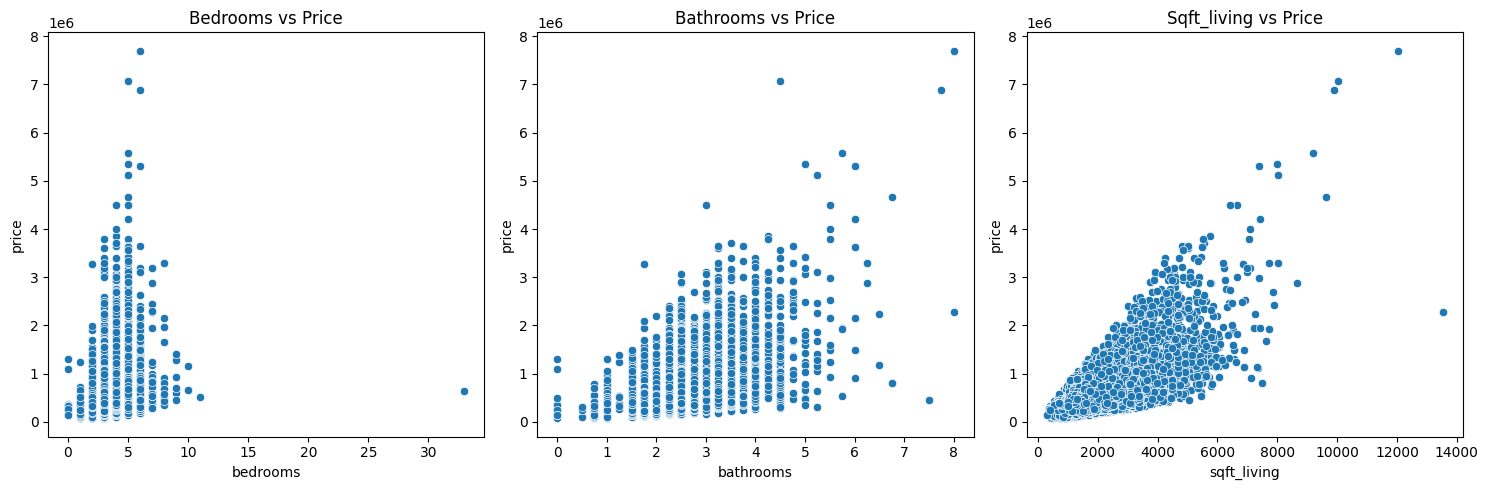

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=house_price, x='bedrooms', y='price')
plt.title('Bedrooms vs Price')
plt.subplot(1, 3, 2)
sns.scatterplot(data=house_price, x='bathrooms', y='price')
plt.title('Bathrooms vs Price')
plt.subplot(1, 3, 3)
sns.scatterplot(data=house_price, x='sqft_living', y='price')
plt.title('Sqft_living vs Price')
plt.tight_layout()
plt.show()

<ipython-input-4-81fc774d8e5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house_price.corr()


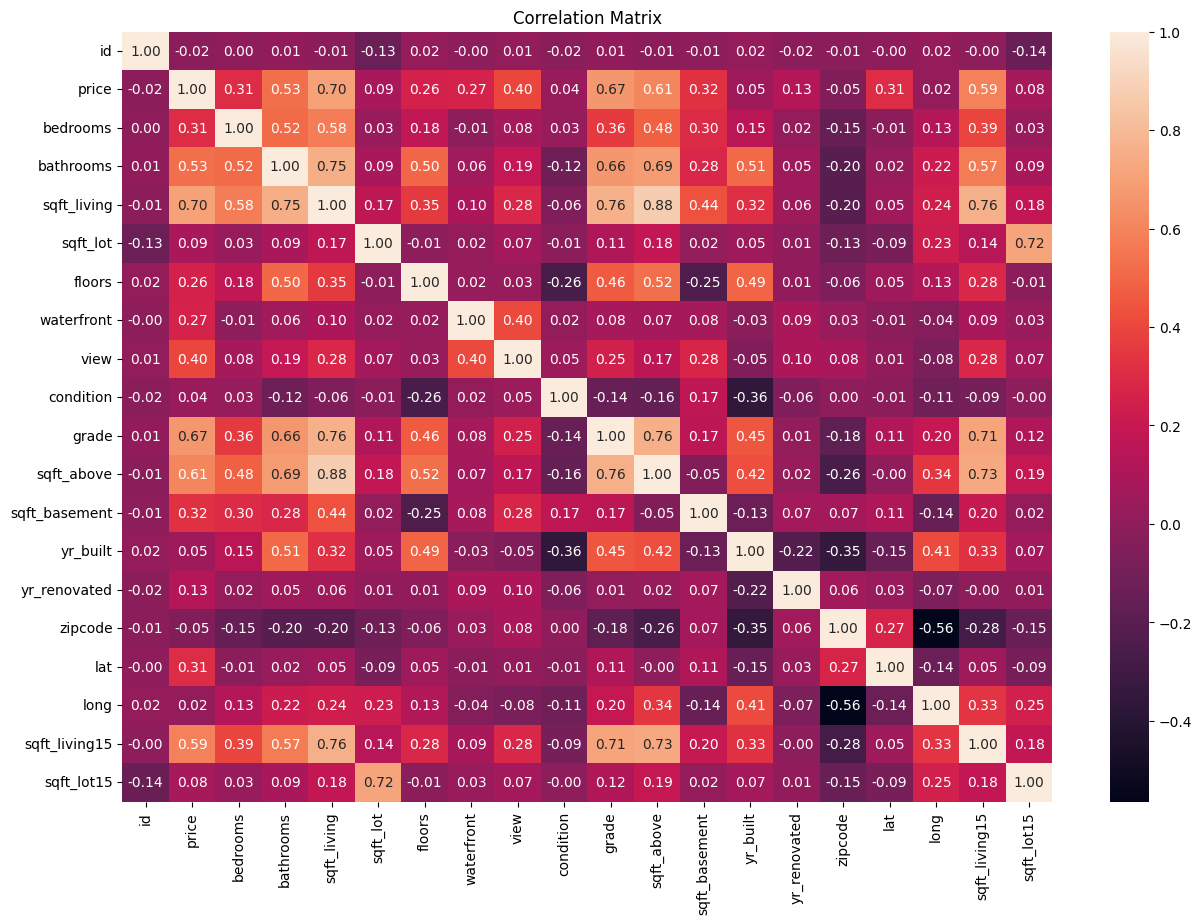

In [ ]:
corr_matrix = house_price.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Price: It has a strong positive correlation with sqft_living, grade, and sqft_above. This indicates that larger and better-graded houses tend to be more expensive.

Sqft_living: Has strong correlations with several variables like bathrooms, sqft_above, and grade, which is expected as these are related to the size and quality of the house.

Bedrooms and Bathrooms: Show moderate correlations with other variables, suggesting they are important but not the sole factors in determining house characteristics.

In [ ]:
house_price.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_price_processed = house_price.drop(['id', 'date', 'sqft_lot' , 'floors', 'condition', 'yr_renovated', 'sqft_lot15', 'sqft_living15'], axis=1)

house_price_processed.head()

#Based on the correlation of the variables with the price column the above variables were dropped
# sqft_lot, sqft_lot15, yr_renovated and yr_built are poorly to medium correlated
#'sqft_living15' is highly correlated but 'sqft_living' is a better variable as sqft_living15 is average sq ft for 15 houses which has no direct relation

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,0,0,7,1180,0,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,0,0,7,2170,400,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,0,0,6,770,0,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,0,0,7,1050,910,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,0,0,8,1680,0,1987,98074,47.6168,-122.045


In [ ]:
house_price_features = house_price_processed.drop(['price'], axis=1)
house_price_features.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,3,1.00,1180,0,0,7,1180,0,1955,98178,47.5112,-122.257
1,3,2.25,2570,0,0,7,2170,400,1951,98125,47.7210,-122.319
2,2,1.00,770,0,0,6,770,0,1933,98028,47.7379,-122.233
3,4,3.00,1960,0,0,7,1050,910,1965,98136,47.5208,-122.393
4,3,2.00,1680,0,0,8,1680,0,1987,98074,47.6168,-122.045


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(house_price_features)

house_price_features_scaled = pd.DataFrame(scaled_features, columns=house_price_features.columns)

house_price_features_scaled.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,-0.398737,-1.447464,-0.979835,-0.087173,-0.305759,-0.558836,-0.734708,-0.658681,-0.544898,1.870152,-0.352572,-0.306079
1,-0.398737,0.175607,0.533634,-0.087173,-0.305759,-0.558836,0.460841,0.245141,-0.681079,0.879568,1.161568,-0.746341
2,-1.473959,-1.447464,-1.426254,-0.087173,-0.305759,-1.409587,-1.229834,-0.658681,-1.293892,-0.933388,1.283537,-0.135655
3,0.676485,1.149449,-0.130550,-0.087173,-0.305759,-0.558836,-0.891699,1.397515,-0.204446,1.085160,-0.283288,-1.271816
4,-0.398737,-0.149007,-0.435422,-0.087173,-0.305759,0.291916,-0.130895,-0.658681,0.544548,-0.073636,0.409550,1.199335


# Training a Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
X = torch.tensor(house_price_features_scaled.values, dtype=torch.float32)
y = torch.tensor(house_price['price'].values, dtype=torch.float32).view(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def splitData(x, y, n1):
    x1 = x[:n1]
    y1 = y[:n1]
    x2 = x[n1:]
    y2 = y[n1:]
    return x1, y1, x2, y2


In [ ]:
ntrain = 10000
X_train, y_train, X_test, y_test = splitData(X, y, ntrain)

n1 = int(ntrain/2)
xtrain1, ytrain1, xtrain2, ytrain2 = splitData(X_train, y_train, n1)

In [ ]:
num_epochs = 150

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import numpy as np

In [ ]:
def CQRInterval(scores, y_out_l_pred, y_out_u_pred, alpha):
    n = len(scores)
    t = np.quantile(scores, np.ceil((1-alpha)*(n+1))/n )
    y_out_l = y_out_l_pred - t
    y_out_u = y_out_u_pred + t
    return np.hstack([y_out_l.reshape(-1, 1), y_out_u.reshape(-1, 1)])


def conformalResidueInterval(scores, mu, sigma, alpha):
    n = len(scores)
    t = np.quantile(scores, np.ceil((1-alpha)*(n+1))/n )
    y_out_l = mu - t*sigma
    y_out_u = mu + t*sigma
    return np.hstack([y_out_l.reshape(-1, 1), y_out_u.reshape(-1, 1)])

In [ ]:
class NNet(nn.Module):
    def __init__(self, input_dim, hidden_dim=128):
        super(NNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(0.3)
        self.layer3 = nn.Linear(hidden_dim, hidden_dim)
        self.layer4a = nn.Linear(hidden_dim, 1)
        self.layer4b = nn.Linear(hidden_dim, 1)


    def forward(self, x):
        # x = self.layer1(x)
        x = F.leaky_relu(self.bn1(self.layer1(x)))
        x = F.leaky_relu(self.layer2(x))
        x = self.dropout(x)
        x = F.elu(self.layer3(x))
        a = self.layer4a(x)
        b = self.layer4b(x)
        return a, b


def quantileLoss(y_out_l, y_out_u, y, alpha):
    lower_loss = torch.max( (alpha/2)*(y - y_out_l), (alpha/2-1)*(y - y_out_l) )
    upper_loss = torch.max( (1-alpha/2)*(y - y_out_u), (-alpha/2)*(y - y_out_u) )
    return torch.mean(lower_loss + upper_loss)

# Conformal Prediction

*   We have used conformalized quantile regression to do this because it has the smallest prediction intervals on average while retaining 90% coverage.

* It can be applied to any regression model and it offers clear quantifiable measures of uncertainty.

* It is a very useful strategy in this particular dataset as we are more interested in predicting the range within which the true value is likely to fall rather than just the mean.

In [ ]:
alpha = 0.1

In [ ]:
import matplotlib.pyplot as plt

model = NNet(X.shape[1])
lr = 0.001
epochs = 150
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
optimizer = optim.SGD(model.parameters(), lr=lr)


losses = []

for epoch in range(epochs):
    total_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_out_l, y_out_u = model(x_batch)
        loss = quantileLoss(y_out_l, y_out_u, y_batch, alpha)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    epoch_loss = total_loss / len(train_loader)
    losses.append(epoch_loss)

    if epoch % 20 == 0:
        print('epoch', epoch, 'loss: ', epoch_loss)

epoch 0 loss:  533169.0197683707
epoch 20 loss:  45199.86821710264
epoch 40 loss:  38155.301224291135
epoch 60 loss:  37132.151320387384
epoch 80 loss:  35407.74176941893
epoch 100 loss:  33689.827663238815
epoch 120 loss:  31129.023300219647
epoch 140 loss:  31234.62358975639


## Plot of training loss

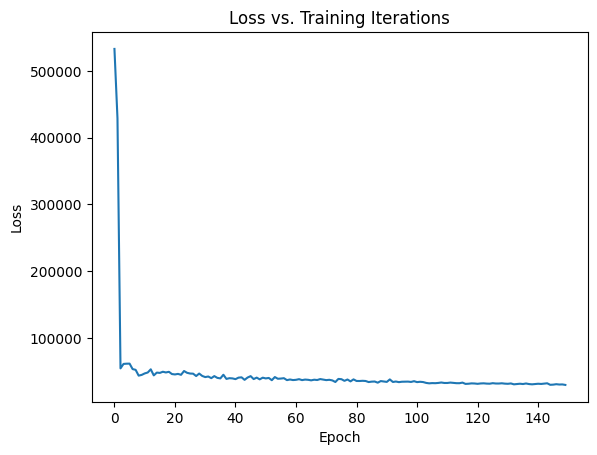

In [ ]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Training Iterations')
plt.show()

In [ ]:
loss

tensor(25243.8242, grad_fn=<MeanBackward0>)

In [ ]:
x_train2 = torch.tensor(xtrain2, dtype=torch.float32)

y_out_l2, y_out_u2 = model(x_train2)
y_out_l2 = y_out_l2.detach().numpy()
y_out_u2 = y_out_u2.detach().numpy()

scores = np.maximum(ytrain2.detach().numpy() - y_out_u2, y_out_l2 - ytrain2.detach().numpy())

x_test = torch.tensor(X_test, dtype=torch.float32)

y_out_l_pred, y_out_u_pred = model(x_test)
y_out_l_pred = y_out_l_pred.detach().numpy()
y_out_u_pred = y_out_u_pred.detach().numpy()

intervals = CQRInterval(scores, y_out_l_pred, y_out_u_pred, alpha)

cov_test = [1 if y_test[i] >= intervals[i, 0] and y_test[i] <= intervals[i, 1] else 0 for i in range(len(y_test))]
print('Percent covered on test data: ', np.mean(cov_test))

<ipython-input-348-bf81c676f563>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train2 = torch.tensor(xtrain2, dtype=torch.float32)
<ipython-input-348-bf81c676f563>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(X_test, dtype=torch.float32)


Percent covered on test data:  0.9044174631878068


### Percent covered on test data:  90.44%

### Plotting only the first and last 50 test values with prediction intervals for ease of visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

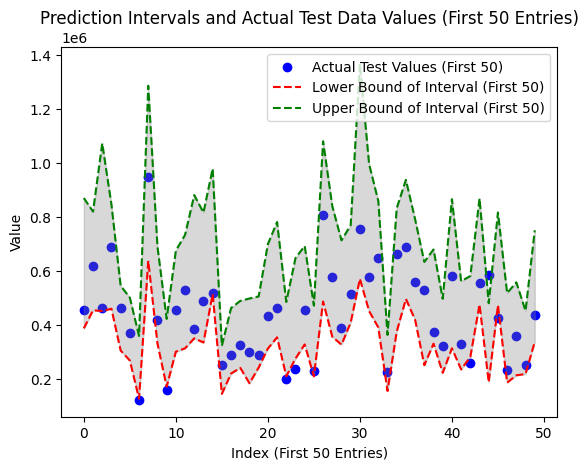

In [ ]:
num_entries = 50
x_axis = range(num_entries)

y_out_l_pred_flat = np.array(y_out_l_pred).flatten()[:num_entries]
y_out_u_pred_flat = np.array(y_out_u_pred).flatten()[:num_entries]
y_test_50 = y_test[:num_entries]

plt.scatter(x_axis, y_test_50, color='blue', label='Actual Test Values (First 50)')

plt.plot(x_axis, y_out_l_pred_flat, color='red', linestyle='--', label='Lower Bound of Interval (First 50)')
plt.plot(x_axis, y_out_u_pred_flat, color='green', linestyle='--', label='Upper Bound of Interval (First 50)')

plt.fill_between(x_axis, y_out_l_pred_flat, y_out_u_pred_flat, color='gray', alpha=0.3)

plt.xlabel('Index (First 50 Entries)')
plt.ylabel('Value')
plt.title('Prediction Intervals and Actual Test Data Values (First 50 Entries)')
plt.legend()
plt.show()

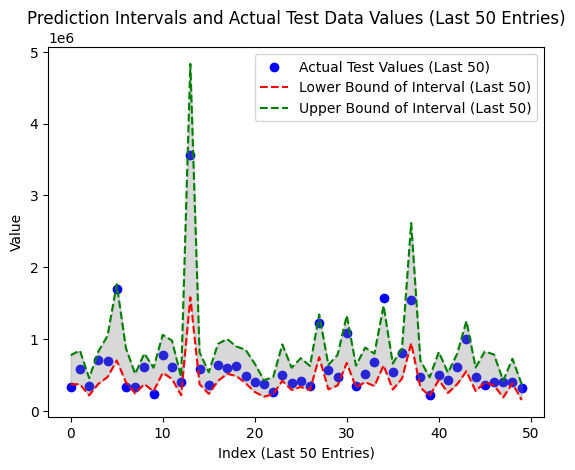

In [ ]:
num_entries = 50
y_out_l_pred_last_50 = np.array(y_out_l_pred)[-num_entries:].flatten()
y_out_u_pred_last_50 = np.array(y_out_u_pred)[-num_entries:].flatten()
y_test_last_50 = np.array(y_test)[-num_entries:].flatten()

x_axis_last_50 = range(len(y_test_last_50))

plt.scatter(x_axis_last_50, y_test_last_50, color='blue', label='Actual Test Values (Last 50)')

plt.plot(x_axis_last_50, y_out_l_pred_last_50, color='red', linestyle='--', label='Lower Bound of Interval (Last 50)')
plt.plot(x_axis_last_50, y_out_u_pred_last_50, color='green', linestyle='--', label='Upper Bound of Interval (Last 50)')

plt.fill_between(x_axis_last_50, y_out_l_pred_last_50, y_out_u_pred_last_50, color='gray', alpha=0.3)
plt.xlabel('Index (Last 50 Entries)')
plt.ylabel('Value')
plt.title('Prediction Intervals and Actual Test Data Values (Last 50 Entries)')
plt.legend()
plt.show()

In [ ]:
y_out_l_pred_flat = np.array(y_out_l_pred).flatten()
y_out_u_pred_flat = np.array(y_out_u_pred).flatten()

interval_lengths = y_out_u_pred_flat - y_out_l_pred_flat

mean_interval_length = np.mean(interval_lengths)

print("Mean Interval Length:", mean_interval_length)


Mean Interval Length: 448682.88


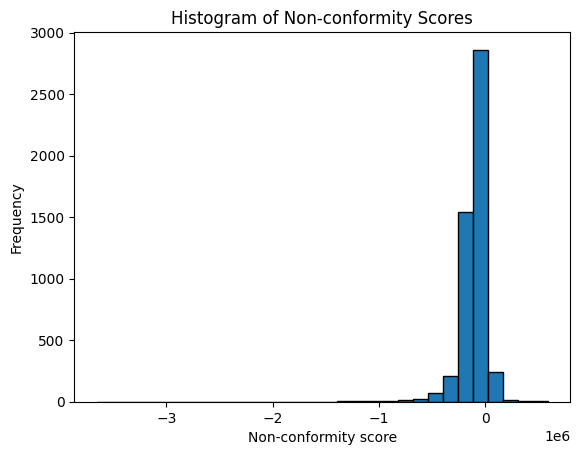

In [ ]:
plt.hist(scores, bins=30, edgecolor='black')
plt.xlabel('Non-conformity score')
plt.ylabel('Frequency')
plt.title('Histogram of Non-conformity Scores')
plt.show()

In [ ]:
house_price_processed.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,0,0,7,1180,0,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,0,0,7,2170,400,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,0,0,6,770,0,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,0,0,7,1050,910,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,0,0,8,1680,0,1987,98074,47.6168,-122.045


# Hypothesis Testing

## The chosen hypotheses for the Independent Samples t-test are based on the principle of comparing two independent groups to determine if there is a statistically significant difference between their means.

**Null Hypothesis (H0):** There is no difference in prices between houses with and without waterfronts.

**Alternative Hypothesis (H1):** There is a significant difference in prices.

In [ ]:
from scipy import stats

waterfront_group = house_price_processed[house_price_processed['waterfront'] == 1]['price']
no_waterfront_group = house_price_processed[house_price_processed['waterfront'] == 0]['price']

# t-test
t_stat, p_value = stats.ttest_ind(waterfront_group, no_waterfront_group, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is significant evidence that the prices differ between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is not significant evidence that the prices differ between the two groups.")

T-statistic: 12.875876891278113
P-value: 1.3791122647490577e-26
Reject the null hypothesis: There is significant evidence that the prices differ between the two groups.


**Null Hypothesis (H0):** There is no difference in prices between houses with and without a view.

**Alternative Hypothesis (H1):** There is a significant difference in prices.


In [ ]:
from scipy import stats

view_group = house_price_processed[house_price_processed['view'] == 1]['price']
no_view_group = house_price_processed[house_price_processed['view'] == 0]['price']

# t-test
t_stat, p_value = stats.ttest_ind(view_group, no_view_group, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is significant evidence that the prices differ between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is not significant evidence that the prices differ between the two groups.")

T-statistic: 11.22854092763461
P-value: 4.831954686169302e-25
Reject the null hypothesis: There is significant evidence that the prices differ between the two groups.


**Null Hypothesis (H0):** There is no difference in prices between houses with 5 bedrooms and 6 bedrooms.

**Alternative Hypothesis (H1):** There is a significant difference in prices.

In [ ]:
from scipy import stats

bedroom_5_group = house_price_processed[house_price_processed['bedrooms'] == 5]['price']
bedroom_6_group = house_price_processed[house_price_processed['bedrooms'] == 6]['price']

t_stat, p_value = stats.ttest_ind(bedroom_5_group, bedroom_6_group, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is significant evidence that the prices differ between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is not significant evidence that the prices differ between the two groups.")

T-statistic: -0.7676689266828749
P-value: 0.44324268985499593
Fail to reject the null hypothesis: There is not significant evidence that the prices differ between the two groups.


# Extras:

We attempted multiple neural networks but chose to go with the one in our first section. One of the other ones we attempted was a neural network for predicting the decade that the house was built in. The code and explanations for that will be below

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

#Adding a decade column - anything before 1900 and after 2010 was ignored due to lack of data
df = df.drop(columns=['date'])
df['decade_built'] = pd.cut(df['yr_built'], bins=range(1900, 2021, 10), labels=range(1900, 2020, 10))
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,decade_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,1950
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1950
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,1930
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1960
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,2000
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,2010
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,2000
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,2000


In [ ]:
# Drop features that have to do with dates
features = df.drop(columns=['id', 'yr_built', 'decade_built', 'yr_renovated', 'year', 'month'])

# Target variable
target = df['decade_built']

# Convert labels to numerical values
label_encoder = LabelEncoder()
target_encoded = torch.tensor(label_encoder.fit_transform(target), dtype=torch.long)

# Convert DataFrame to PyTorch tensors
X = torch.tensor(features.values, dtype=torch.float32)
y = target_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler_X = StandardScaler()
X_train_scaled = torch.tensor(scaler_X.fit_transform(X_train), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler_X.transform(X_test), dtype=torch.float32)

# Define the neural network model
class DecadePredictor(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DecadePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
num_classes = len(target.unique())
model = DecadePredictor(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
batch_size = 64

for epoch in range(num_epochs):
    for i in range(0, len(X_train_scaled), batch_size):
        batch_X = X_train_scaled[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]


        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


with torch.no_grad():
    test_outputs = model(X_test_scaled)
    _, predicted = torch.max(test_outputs, 1)


results_df = pd.DataFrame({
    'Actual_Decade': label_encoder.inverse_transform(y_test),
    'Predicted_Decade': label_encoder.inverse_transform(predicted)
})


results_df['Decade_Difference'] = results_df['Actual_Decade'] - results_df['Predicted_Decade']

correct_decade = (results_df['Decade_Difference'] == 0).sum()
within_1_decade = ((results_df['Decade_Difference'] >= -10) & (results_df['Decade_Difference'] <= 10)).sum()
within_2_decades = ((results_df['Decade_Difference'] >= -20) & (results_df['Decade_Difference'] <= 20)).sum()

total_samples = len(y_test)

accuracy_correct_decade = correct_decade / total_samples
accuracy_within_1_decade = within_1_decade / total_samples
accuracy_within_2_decades = within_2_decades / total_samples

print(f'\nAccuracy on Test Set after {num_epochs} epochs:')
print(f'Accuracy predicting correct decade: {accuracy_correct_decade * 100:.2f}%')
print(f'Accuracy predicting within 1 decade: {accuracy_within_1_decade * 100:.2f}%')
print(f'Accuracy predicting within 2 decades: {accuracy_within_2_decades * 100:.2f}%')

print('\nActual vs Predicted Decades:')
print(results_df)



Accuracy on Test Set after 100 epochs:
Accuracy predicting correct decade: 47.84%
Accuracy predicting within 1 decade: 80.82%
Accuracy predicting within 2 decades: 91.12%

Actual vs Predicted Decades:
      Actual_Decade  Predicted_Decade  Decade_Difference
0            1980.0            1980.0                0.0
1            1970.0            1950.0               20.0
2            1990.0            1990.0                0.0
3            1980.0            1990.0              -10.0
4            2000.0            2000.0                0.0
...             ...               ...                ...
4318         1940.0            1950.0              -10.0
4319         2010.0            2000.0               10.0
4320         2000.0            2000.0                0.0
4321         1960.0            1960.0                0.0
4322         2000.0            2000.0                0.0

[4323 rows x 3 columns]


**A decade was considered to be correctly predicted if the predicted decade matched the actual decade exactly. If it was off by 1 or 2 decades, it was judges to be predicted within 1 or 2 decades, respectively.**

We can see from running the code that this neural network is not incredibly accurate, but is significantly better than random. If chosen randomly, we would expect the accuracy to be as follows:

Accuracy predicting correct decade: 12/144 = **8.33%**

Accuracy predicting within 1 decade: ((11+11)/144) + (12/144) = **23.61%**

Accuracy predicting within 2 decades: ((10+10)/144) + ((11+11)/144) + (12/144) = **37.5%**

This means that the model performed about:
- **39.51%** better than random at predicting the correct decade
- **57.21%** better than random at being within 1 decade
- **53.62%** better than random at being within 2 decades

**We can visualize the distribution of predictions below**

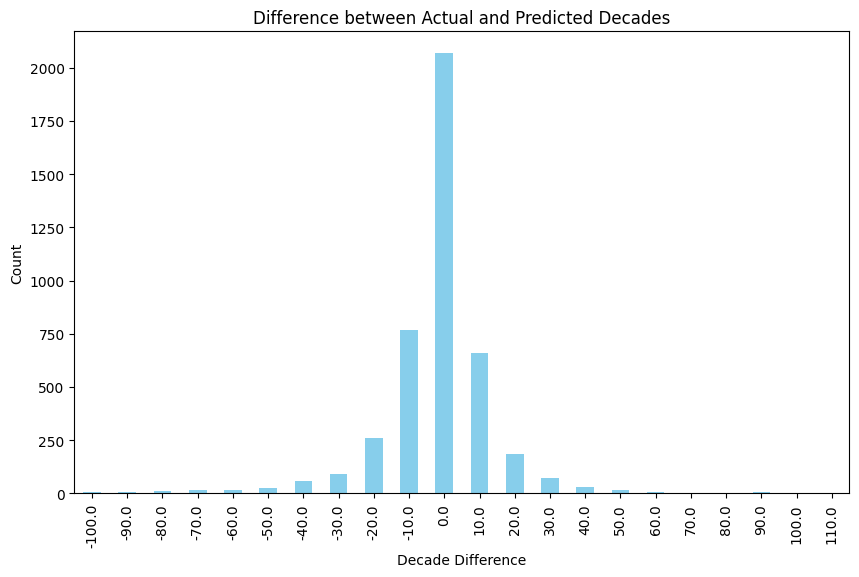

In [ ]:
results_df['Decade_Difference'] = results_df['Actual_Decade'] - results_df['Predicted_Decade']

plt.figure(figsize=(10, 6))
results_df['Decade_Difference'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Difference between Actual and Predicted Decades')
plt.xlabel('Decade Difference')
plt.ylabel('Count')
plt.show()


In [ ]:
abs(results_df['Decade_Difference']).value_counts()

0.0      2068
10.0     1426
20.0      445
30.0      160
40.0       86
50.0       41
60.0       23
70.0       17
80.0       16
90.0        9
100.0       8
110.0       1
Name: Decade_Difference, dtype: int64

Above is how many decades off the prediction is

In [ ]:
df['decade_built'].value_counts()

2000    3443
1960    2544
1950    2450
1970    2393
1980    2362
1990    2136
1940    1858
1920    1184
2010    1098
1910     770
1900     692
1930     596
Name: decade_built, dtype: int64

Just to be sure that the dataset is not just huddled around a single decade and is producing these results, above are the number of rows in the data for each decade

Altough this model was not ultimately used through the main portion of the assignment, we include this here to illsutrate that price is not the potential outcome variable of interest in the dataset. We also include it to show how the decade variable lent itself to interesting analyses, such as the number of decades off the model was. The same principles we learned from this more manageable model we then applied to the main model in this assignment.